# Dataset utilizado: Mall Customer Segmentation Data.
### Link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

## 1) Carga y exploración de datos

In [1421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [1422]:
data = pd.read_csv('./Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [1423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No hay datos nulos presenten en el dataset. Gender solamente se muestra como strings.

In [1424]:
# Comprobando mediante CustomerID si se repiten Clientes
data['CustomerID'].duplicated().any()

False

In [1425]:
data.groupby('Gender').count()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,112,112,112,112
Male,88,88,88,88


In [1426]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Como hay una gran variadad con respecto a los valores máximos y mínimos de las variables, se decide en normalizar los datos. Además, se eliminarán las variables Customer ID y Gender para realizar el análisis en torno a datos como la edad, ingresos y calificación según su comportamiento.

## 2) Preprocesamiento de datos

In [1427]:
# Eliminar columnas
X = data.drop(['CustomerID', 'Gender'], axis=1)
X 

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [1428]:
#Aplicar normalización en los datos
from sklearn.preprocessing import StandardScaler

In [1429]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns= X.columns)
X_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


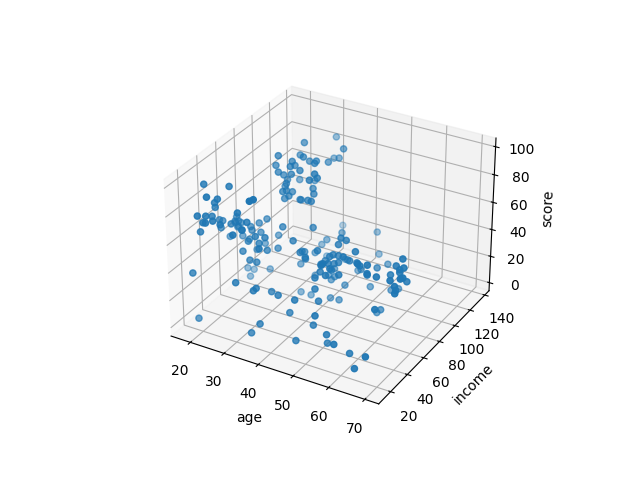

In [1430]:
%matplotlib widget 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'])
ax.set_xlabel('age')
ax.set_ylabel('income')
ax.set_zlabel('score')
plt.show()

A partir del gráfico, se pueden distinguir algunos posibles grupos de usuarios. Por ejemplo: Usuarios jóvenes que compran muy seguido pero que no tienen una gran fuente de ingresos, o adultos mayores que no compran frecuentemente a pesar de tener mayores ingresos.

Considerando que los datos están conformados por tres variables, se modificará principalmente la cantidad mínima de puntos que puede conformar un clúster para que sea mayor a la cantidad de features. Sin embargo, también se modificará la variable epsilon en torno a la distancia entre puntos luego de ser normalizados.

## 3) Implementación de DBSCAN

In [1431]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [1432]:
db = DBSCAN(eps=0.575, min_samples=8).fit(X_scaled)
db_labels = db.labels_

n_clusters_ = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise_ = list(db_labels).count(-1)

print("clusters: %d" % n_clusters_)
print("noise points: %d" % n_noise_)

clusters: 5
noise points: 58


## 4) Visualización

In [1433]:
%matplotlib widget 

# predecir usando los datos ya escalados.
prediction = db.fit_predict(X=scaler.fit_transform(X))
X['label']=prediction
X.head(100)

,Age,Annual Income (k$),Spending Score (1-100),label
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,-1
...,...,...,...,...
95,24,60,52,2
96,47,60,47,1
97,27,60,50,2
98,48,61,42,1


In [1434]:
labels = pd.Series(X['label'].unique()).to_list()
labels

[-1, 0, 1, 2, 3, 4]

Visualización con ruido

C:\Users\benja\AppData\Local\Temp\ipykernel_16832\618059798.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", n)
C:\Users\benja\AppData\Local\Temp\ipykernel_16832\618059798.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=customers['Age'], ys=customers['Annual Income (k$)'], zs=customers['Spending Score (1-100)'], c=cmap(i), label=group_name)


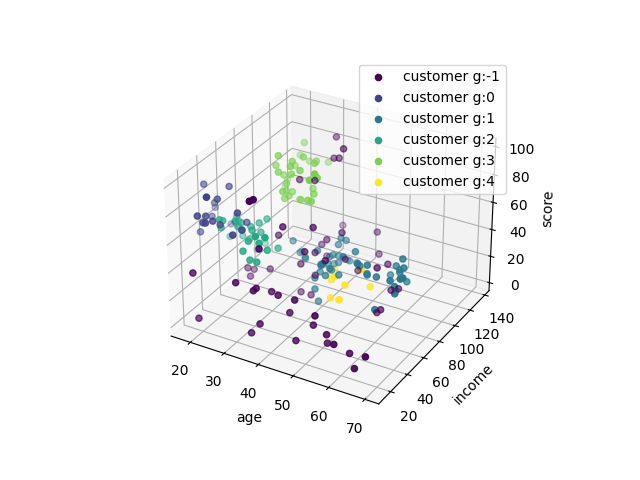

In [1435]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
n = len(labels)
cmap = plt.cm.get_cmap("viridis", n)
for i in range(n):
    customers = X[X['label'] == labels[i]]
    group_name = 'customer g:' + str(labels[i])
    ax.scatter(xs=customers['Age'], ys=customers['Annual Income (k$)'], zs=customers['Spending Score (1-100)'], c=cmap(i), label=group_name)

ax.set_xlabel('age')
ax.set_ylabel('income')
ax.set_zlabel('score')
ax.legend()
plt.show()

Visualización sin ruido

C:\Users\benja\AppData\Local\Temp\ipykernel_16832\764685161.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis", n)
C:\Users\benja\AppData\Local\Temp\ipykernel_16832\764685161.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(xs=customers['Age'], ys=customers['Annual Income (k$)'], zs=customers['Spending Score (1-100)'], c=cmap(i), label=group_name)


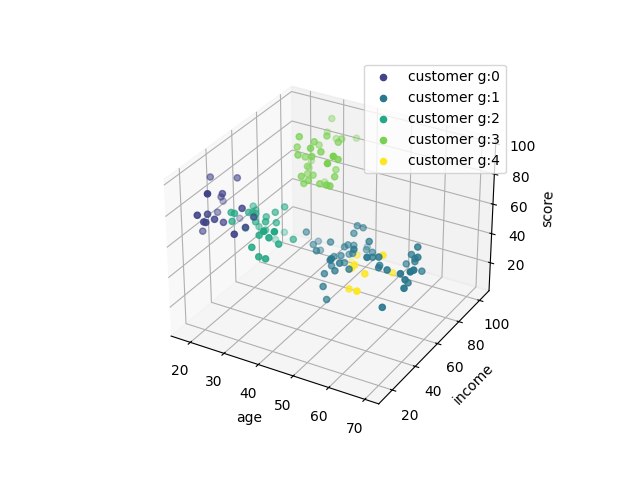

In [1436]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
n = len(labels)
cmap = plt.cm.get_cmap("viridis", n)
for i in range(1, n):
    customers = X[X['label'] == labels[i]]
    group_name = 'customer g:' + str(labels[i])
    ax.scatter(xs=customers['Age'], ys=customers['Annual Income (k$)'], zs=customers['Spending Score (1-100)'], c=cmap(i), label=group_name)

ax.set_xlabel('age')
ax.set_ylabel('income')
ax.set_zlabel('score')
ax.legend()
plt.show()

A partir del gráfico se pueden sacar algunas conclusiones.
* Los clientes que representan a los grupos con el label 0 y 3 podrían ser considerados como los más importantes de retener por sus puntajes altos de comportamiento/gastos, aunque cabe destacar que ambos grupos se están diferenciando por el nivel de ingresos y, en menor grado, por rango etario.
* Los grupos 1 y 2 representarían clientes de ingresos promedio que no suelen comprar muy seguido, por lo que no se encuentran totalmente fidelizados. De estos grupos, el factor que permite diferenciar a estos grupos es que estos están compuestos por personas jóvenes en el grupo 1, mientras que en el grupo 2 lo conforma gente mayor en gran parte (>30). Las tiendas podrían tratar de fidelizar a tales clientes, pero no son la mayor prioridad.
* El grupo 4 serían clientes inactivos cuyos ingresos son altos, por lo que sería importante tratar de captar su interés para que sean potenciales clientes fieles.


## 5) Interpretación y Discusión

Luego de varios intentos, se pudo ver la manera en la que trabaja DBSCAN a comparación de K-Means, por el hecho de que el primero es capaz de 'reconocer' conjuntos automáticamente a partir de estimaciones de densidad entre puntos y por la inclusión del factor 'ruido'. Esto puede ser ideal en casos como el aplicado en este notebook (principalmente por la forma irregular en la que se mostraban los datos al graficarlos), pero requiere más ensayo y error para poder encontrar grupos que nos puedan entregar suficiente información de valor, por lo que es importante entender bien el impacto de los hiperparámetros y comprender el problema que se está abordando. En el caso de lo aplicado para este laboratorio, esto pudo apreciarse en la comparación entre los gráficos con y sin ruido, donde una gran porción de los datos estaba siendo considerados como ruido. Esto requiere de un mayor ajuste de los hiperparámetros para comprobar la existencia de más grupos de clientes (como la gente de bajo Spending Score e ingresos).